In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/kaggle/input/pizza-sales-dataset/pizza_sales.csv')

In [3]:
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616.0,21348.0,ckn_alfredo_m,1.0,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617.0,21348.0,four_cheese_l,1.0,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618.0,21348.0,napolitana_s,1.0,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619.0,21349.0,mexicana_l,1.0,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [5]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [6]:
df.describe(include='all')

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
count,48620.000000,48620.000000,48620,48620.000000,48620,48620,48620.000000,48620.000000,48620,48620,48620,48620
unique,NaN,NaN,91,NaN,358,16382,NaN,NaN,5,4,32,32
top,NaN,NaN,big_meat_s,NaN,26-11-2015,12:32:00,NaN,NaN,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
freq,NaN,NaN,1811,NaN,261,26,NaN,NaN,18526,14579,2416,2416
mean,24310.500000,10701.479761,NaN,1.019622,NaN,NaN,16.494132,16.821474,NaN,NaN,NaN,NaN
std,14035.529381,6180.119770,NaN,0.143077,NaN,NaN,3.621789,4.437398,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,1.000000,NaN,NaN,9.750000,9.750000,NaN,NaN,NaN,NaN
25%,12155.750000,5337.000000,NaN,1.000000,NaN,NaN,12.750000,12.750000,NaN,NaN,NaN,NaN
50%,24310.500000,10682.500000,NaN,1.000000,NaN,NaN,16.500000,16.500000,NaN,NaN,NaN,NaN
75%,36465.250000,16100.000000,NaN,1.000000,NaN,NaN,20.250000,20.500000,NaN,NaN,NaN,NaN


In [12]:
df.groupby('pizza_name').value_counts()

pizza_name                         pizza_id  order_id  pizza_name_id  quantity  order_date  order_time  unit_price  total_price  pizza_size  pizza_category  pizza_ingredients                                                                     
The Barbecue Chicken Pizza         11.0      6.0       bbq_ckn_s      1.0       1/1/2015    12:29:36    12.75       12.75        S           Chicken         Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce       1
                                   26.0      11.0      bbq_ckn_l      1.0       1/1/2015    13:02:59    20.75       20.75        L           Chicken         Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce       1
                                   41434.0   18239.0   bbq_ckn_l      1.0       7/11/2015   16:44:22    20.75       20.75        L           Chicken         Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce       1
         

In [13]:
df.groupby('quantity').count()[['pizza_name']]

,pizza_name
quantity,
1.0,47693
2.0,903
3.0,21
4.0,3


In [14]:
df.groupby('order_id').count()[['pizza_name']]

,pizza_name
order_id,
1.0,1
2.0,5
3.0,2
4.0,1
5.0,1
...,...
21346.0,4
21347.0,4
21348.0,3


In [17]:
df[df['pizza_name'] == df['pizza_name'].max()]['pizza_name']
df[df['pizza_name']==df['pizza_name'].min()]['pizza_name']

10       The Barbecue Chicken Pizza
25       The Barbecue Chicken Pizza
42       The Barbecue Chicken Pizza
62       The Barbecue Chicken Pizza
70       The Barbecue Chicken Pizza
                    ...            
48564    The Barbecue Chicken Pizza
48571    The Barbecue Chicken Pizza
48575    The Barbecue Chicken Pizza
48611    The Barbecue Chicken Pizza
48619    The Barbecue Chicken Pizza
Name: pizza_name, Length: 2372, dtype: object

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

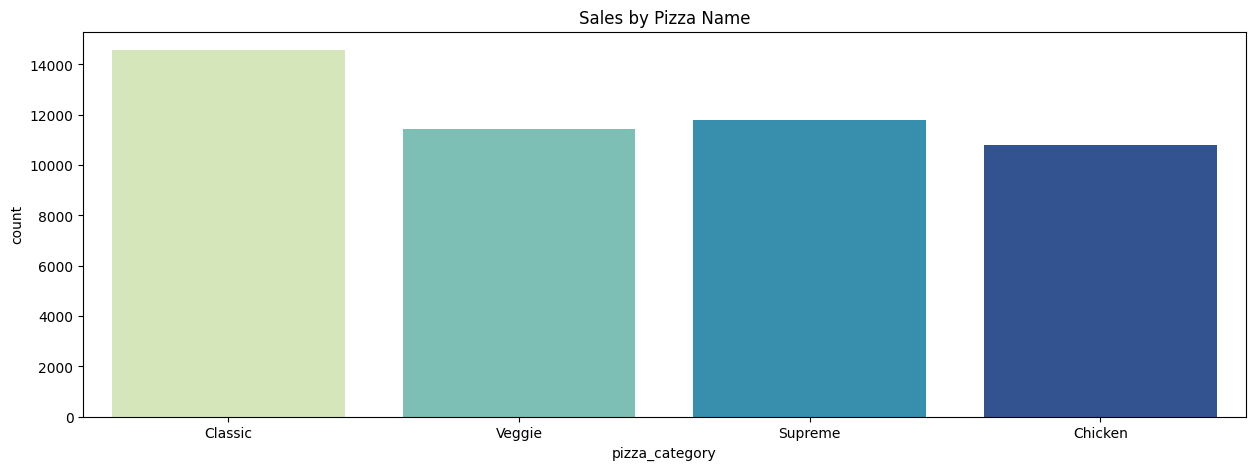

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="pizza_category", palette="YlGnBu")
plt.title("Sales by Pizza Name")
plt.show()

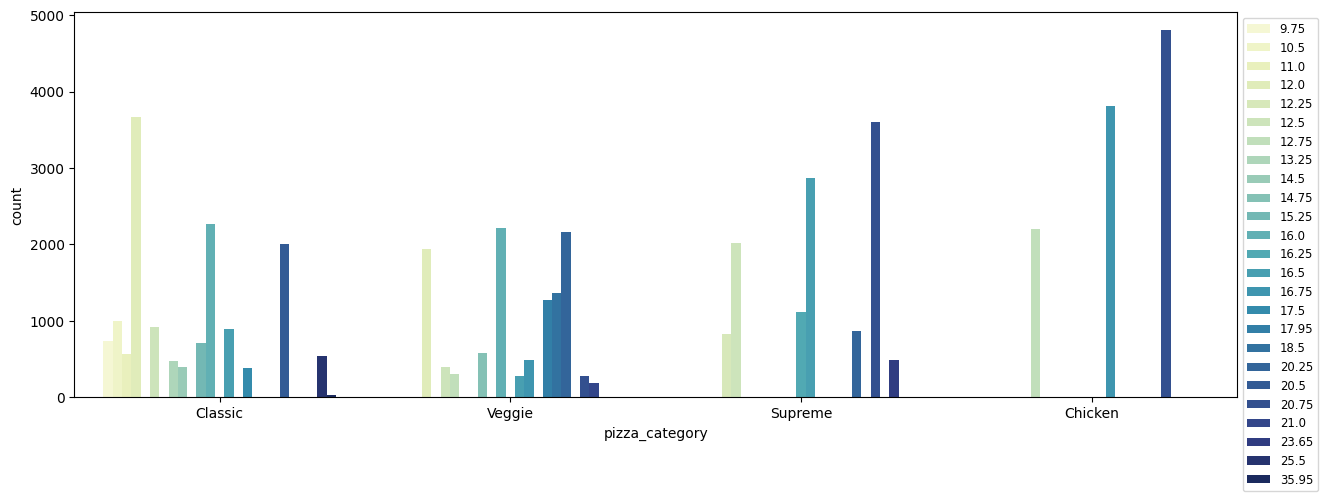

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="pizza_category", palette="YlGnBu", hue="unit_price")
plt.legend(bbox_to_anchor=(1,1), loc='upper left', fontsize='small')
plt.show()

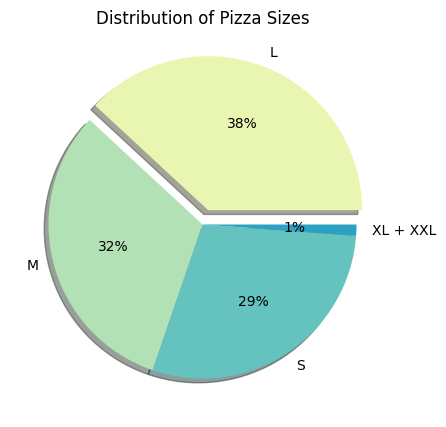

In [26]:
plt.figure(figsize=(10,5))
color_palette = sns.color_palette("YlGnBu")
size = df["pizza_size"].value_counts()
size["XL + XXL"] = size["XL"] + size["XXL"]
size = size.drop(["XL", "XXL"])


plt.pie(data = size,\
        x=size.values, labels = size.index, \
        explode=(0.1,0,0,0), autopct='%1.0f%%', \
        shadow=True, colors=color_palette)
plt.title("Distribution of Pizza Sizes")
plt.show()

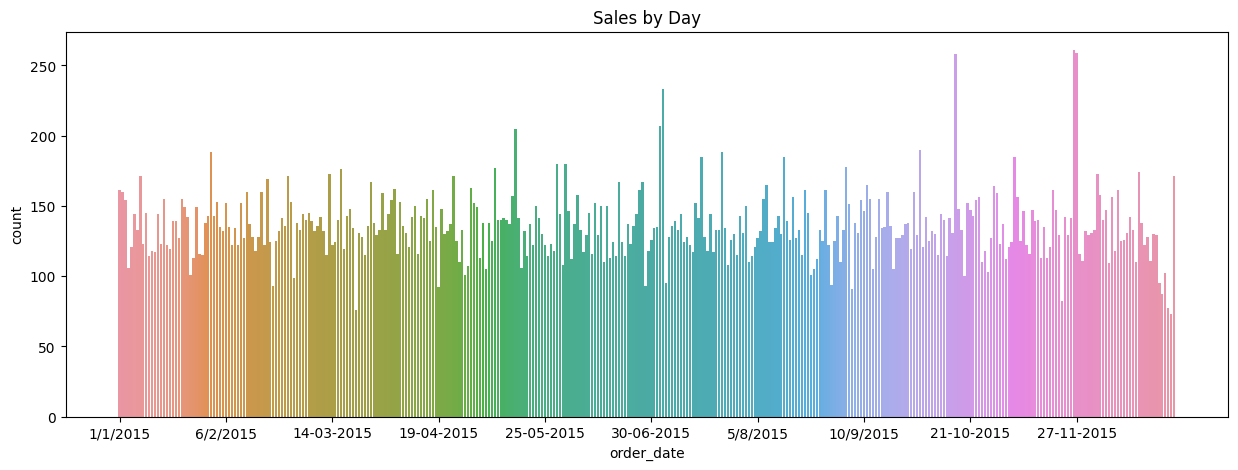

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x= 'order_date')
plt.locator_params(axis='x', nbins=10)
plt.title("Sales by Day")
plt.show()

In [29]:
df["order_date"].value_counts().head()

order_date
26-11-2015    261
27-11-2015    259
15-10-2015    258
4/7/2015      233
3/7/2015      207
Name: count, dtype: int64

In [30]:
frequency = {}
for row in df["pizza_ingredients"].str.split(","):
    for word in row:
        word = word.strip()
        if word in frequency:
            frequency[word] += 1
        else:
            frequency[word] = 1
frequency_df = pd.DataFrame.from_dict([frequency]).T.sort_values(by=0, ascending=False).head(10)

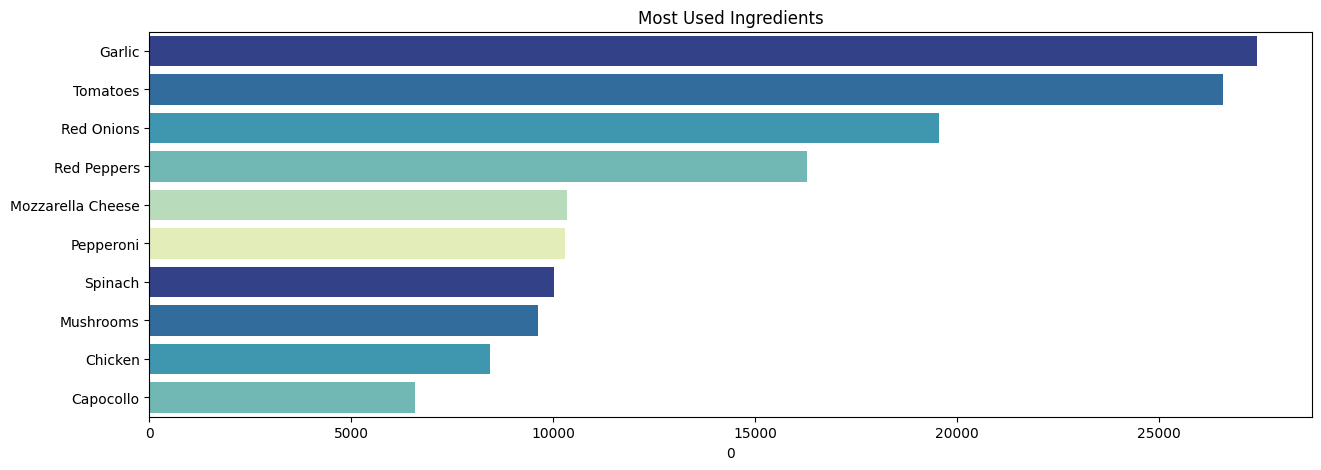

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(data = frequency_df, x=0, y=frequency_df.index, palette=sns.color_palette("YlGnBu_r"))
plt.title("Most Used Ingredients")
plt.show()